In [2]:
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Start by importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

In [6]:
finalized_df = pd.read_csv('/finalized.csv')

In [7]:
finalized_df = finalized_df[['Date', 'State_from', 'State_to', 'Jem_Time']]
finalized_df.head()

,Date,State_from,State_to,Jem_Time
0,2022-02-01 00:00:00,Breda,Tilburg,0
1,2022-02-01 00:00:00,Tilburg,Breda,0
2,2022-02-01 01:00:00,Breda,Tilburg,0
3,2022-02-01 01:00:00,Tilburg,Breda,0
4,2022-02-01 02:00:00,Breda,Tilburg,0


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
finalized_df['State_from'] = le.fit_transform(finalized_df['State_from'])
finalized_df['State_to'] = le.transform(finalized_df['State_to'])

In [9]:
# Make sure the data is a time series
finalized_df.index = pd.to_datetime(finalized_df['Date'])
finalized_df = finalized_df[['State_from', 'State_to', 'Jem_Time']]
finalized_df.head()

,State_from,State_to,Jem_Time
Date,,,
2022-02-01 00:00:00,0,1,0
2022-02-01 00:00:00,1,0,0
2022-02-01 01:00:00,0,1,0
2022-02-01 01:00:00,1,0,0
2022-02-01 02:00:00,0,1,0


In [10]:
# Extract input and output variables
X = finalized_df.iloc[:, 1:-1]
y = finalized_df.iloc[:, -1]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)



Epoch 1/10
291/291 [==============================] - 5s 3ms/step - loss: 156.0123
Epoch 2/10
291/291 [==============================] - 1s 3ms/step - loss: 148.8388
Epoch 3/10
291/291 [==============================] - 1s 3ms/step - loss: 146.8807
Epoch 4/10
291/291 [==============================] - 1s 3ms/step - loss: 146.3474
Epoch 5/10
291/291 [==============================] - 1s 3ms/step - loss: 146.2241
Epoch 6/10
291/291 [==============================] - 1s 3ms/step - loss: 146.2299
Epoch 7/10
291/291 [==============================] - 1s 3ms/step - loss: 146.1941
Epoch 8/10
291/291 [==============================] - 1s 3ms/step - loss: 146.2074
Epoch 9/10
291/291 [==============================] - 1s 3ms/step - loss: 146.2173
Epoch 10/10
73/73 [==============================] - 1s 2ms/step


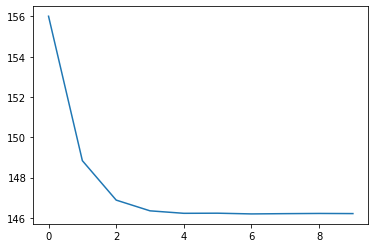

In [11]:
# plot metrics
pyplot.plot(history.history['loss'])
pyplot.show()

In [12]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root mean squared error: {:.2f}".format(rmse))

Root mean squared error: 13.50


ARIMA

In [ ]:
import pmdarima as pm

In [13]:
data = finalized_df

In [14]:
data = data[['State_from', 'State_to', 'Jem_Time']]
data.head()

,State_from,State_to,Jem_Time
Date,,,
2022-02-01 00:00:00,0,1,0
2022-02-01 00:00:00,1,0,0
2022-02-01 01:00:00,0,1,0
2022-02-01 01:00:00,1,0,0
2022-02-01 02:00:00,0,1,0


In [20]:
data = data[data['State_from'] == 0]
data.head()

,State_from,State_to,Jem_Time
Date,,,
2022-02-01 00:00:00,0,1,0
2022-02-01 01:00:00,0,1,0
2022-02-01 02:00:00,0,1,0
2022-02-01 03:00:00,0,1,0
2022-02-01 04:00:00,0,1,0


In [21]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

In [22]:
# Split the data into train and test sets
train, test = data[0:train_size], data[train_size:]
train.head()

,State_from,State_to,Jem_Time
Date,,,
2022-02-01 00:00:00,0,1,0
2022-02-01 01:00:00,0,1,0
2022-02-01 02:00:00,0,1,0
2022-02-01 03:00:00,0,1,0
2022-02-01 04:00:00,0,1,0


In [24]:
model = pm.auto_arima(data['Jem_Time'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=10.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=41285.799, Time=0.12 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=39798.358, Time=4.64 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=40057.091, Time=5.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=41753.688, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=39802.935, Time=0.30 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=39676.159, Time=15.43 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=44.15 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=16.76 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=40995.488, Time=11.57 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=39677.799, Time=21.00 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=39677.829, Time=19.87 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=39897.376, Time=13.70 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=39680.083, Time=25.72 sec
 ARIMA(1,0,0)(

In [25]:
model.fit(train['Jem_Time'])

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

In [30]:
forecast=model.predict(n_periods=test_size, return_conf_int=True)

In [31]:
forecast

(2022-08-13 15:00:00    14.638669
 2022-08-13 16:00:00     7.186570
 2022-08-13 17:00:00     4.501917
 2022-08-13 18:00:00     3.219736
 2022-08-13 19:00:00     2.607372
                          ...    
 2022-09-30 20:00:00     2.299432
 2022-09-30 21:00:00     2.299432
 2022-09-30 22:00:00     2.299432
 2022-09-30 23:00:00     2.299432
 2022-10-01 00:00:00     2.299432
 Freq: H, Length: 1162, dtype: float64, array([[  1.06413052,  28.21320741],
        [ -7.85667737,  22.22981827],
        [-10.85668178,  19.86051511],
        ...,
        [-13.31695721,  17.91582133],
        [-13.31695721,  17.91582133],
        [-13.31695721,  17.91582133]]))

In [32]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [33]:
forecast_df

,Prediction
Date,
2022-08-13 15:00:00,14.638669
2022-08-13 16:00:00,7.186570
2022-08-13 17:00:00,4.501917
2022-08-13 18:00:00,3.219736
2022-08-13 19:00:00,2.607372
...,...
2022-09-30 20:00:00,2.299432
2022-09-30 21:00:00,2.299432
2022-09-30 22:00:00,2.299432


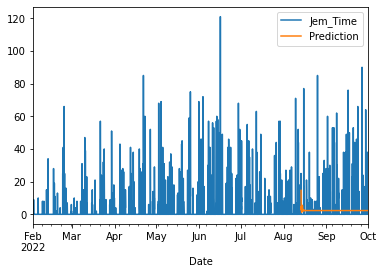

In [35]:
pd.concat([data['Jem_Time'],forecast_df],axis=1).plot()

In [36]:
predictions = forecast[0]

In [43]:
predictions =  list(predictions)
y_test = list(test['Jem_Time'])

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root mean squared error: {:.2f}".format(rmse))

Root mean squared error: 9.84
